In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib.ticker import MultipleLocator

In [2]:
dau_df = pd.read_csv('customer_metrics_data/dau.csv')

In [3]:
dau_df

,count,date_day
0,1,2016-09-04
1,1,2016-09-05
2,1,2016-09-13
3,1,2016-09-15
4,1,2016-10-02
...,...,...
629,1,2018-09-29
630,1,2018-10-01
631,1,2018-10-03
632,1,2018-10-16


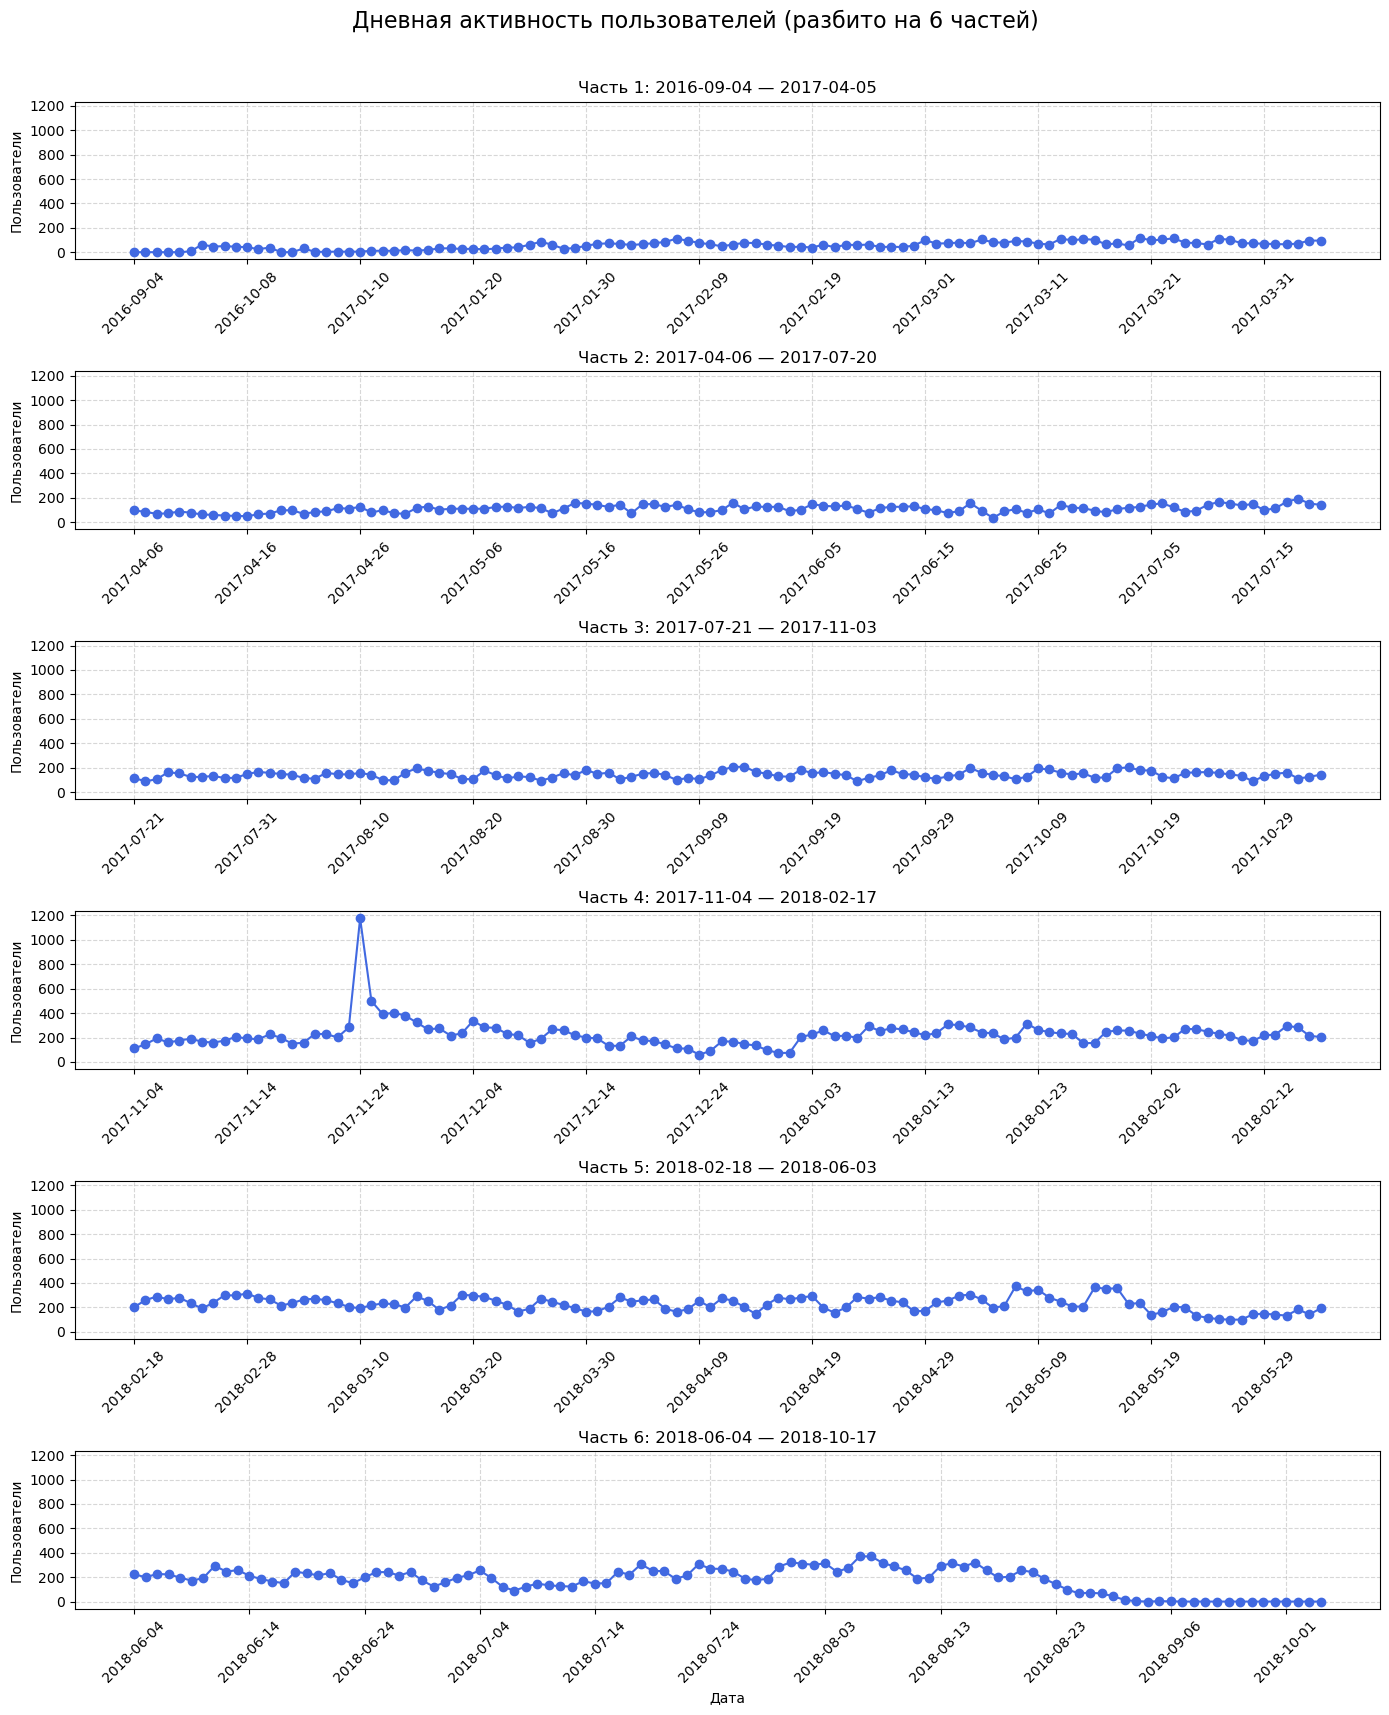

In [17]:
num_parts = 6
total_rows = len(dau_df)
rows_per_part = math.ceil(total_rows / num_parts)

fig, axes = plt.subplots(num_parts, 1, figsize=(14, num_parts * 3), sharey=True)

for i in range(num_parts):
    start_idx = i * rows_per_part
    end_idx = min((i + 1) * rows_per_part, total_rows)
    part = dau_df.iloc[start_idx:end_idx]
    
    ax = axes[i]
    ax.plot(part['date_day'], part['count'], marker='o', linestyle='-', color='royalblue')
    ax.set_title(f'Часть {i + 1}: {pd.to_datetime(part["date_day"].min()).date()} — {pd.to_datetime(part["date_day"].max()).date()}', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylabel("Пользователи")
    
    ax.tick_params(axis='x', rotation=45)
    
    ax.yaxis.set_major_locator(MultipleLocator(200))
    
    step = max(1, len(part) // 10)
    ax.set_xticks(ax.get_xticks()[::step])
    ax.set_xticklabels([pd.to_datetime(date).strftime('%Y-%m-%d') for date in part['date_day'][::step]])

plt.suptitle("Дневная активность пользователей (разбито на 6 частей)", fontsize=16)
plt.xlabel("Дата")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('dau_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
mau_df = pd.read_csv('customer_metrics_data/mau.csv')

In [19]:
mau_df

,count,month_year
0,4,2016-09
1,324,2016-10
2,1,2016-12
3,798,2017-01
4,1768,2017-02
5,2682,2017-03
6,2404,2017-04
7,3699,2017-05
8,3245,2017-06
9,4026,2017-07


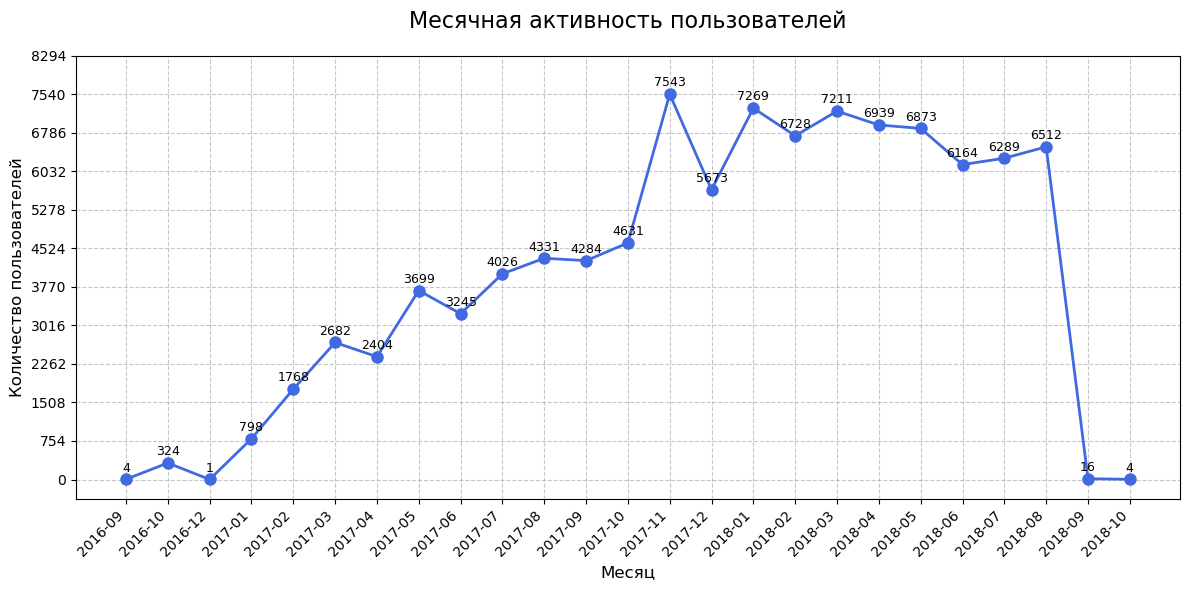

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(mau_df['month_year'], 
         mau_df['count'], 
         marker='o', 
         linestyle='-', 
         color='royalblue',
         markersize=8,
         linewidth=2)

plt.gcf().autofmt_xdate(rotation=45)

for i, row in mau_df.iterrows():
    plt.text(row['month_year'], 
             row['count'] + (max(mau_df['count'])*0.02),
             str(row['count']),
             ha='center',
             fontsize=9)


plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Месячная активность пользователей", fontsize=16, pad=20)
plt.xlabel("Месяц", fontsize=12)
plt.ylabel("Количество пользователей", fontsize=12)

plt.yticks(np.arange(0, 
                    max(mau_df['count']) * 1.1,
                    max(mau_df['count'])//10))

plt.tight_layout()

plt.savefig('mau_analysis.png', dpi=300, bbox_inches='tight')
plt.show()